In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

from src.accelerometer import plot_fourier_transformation, plot_acceleration, plot_feature_columns, accelerometer_feature_engineering
from src.kmeans import kmeans
from src.principal_component_analysis import principal_component_analysis, plot_principal_component_analysis
from src.decision_tree import decision_tree

In [24]:
slow_move_df = pd.read_csv('slow_moves.csv')
slow_move_df = slow_move_df[slow_move_df['age_group']!=0]

In [25]:
slow_move_df.head(5)

,subject,age_group,file,uuid,hand,device,duration,time_stamp,x,y,z,mag
217,50-03,50,c3f64314-9387-4b05-90af-c60d224bd23f.json,c3f64314-9387-4b05-90af-c60d224bd23f,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,125,1670852909113,-82,-364,3354,3374.690504
218,50-03,50,c3f64314-9387-4b05-90af-c60d224bd23f.json,c3f64314-9387-4b05-90af-c60d224bd23f,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,183,1670852909171,-86,-364,3370,3390.691965
219,50-03,50,c3f64314-9387-4b05-90af-c60d224bd23f.json,c3f64314-9387-4b05-90af-c60d224bd23f,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,212,1670852909200,-56,-370,3334,3354.935469
220,50-03,50,c3f64314-9387-4b05-90af-c60d224bd23f.json,c3f64314-9387-4b05-90af-c60d224bd23f,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,242,1670852909230,-82,-368,3392,3412.889099
221,50-03,50,c3f64314-9387-4b05-90af-c60d224bd23f.json,c3f64314-9387-4b05-90af-c60d224bd23f,dominant,C1C0369D-9684-B08A-4B55-12AD667E37FE,273,1670852909261,-88,-138,3366,3369.976855


In [26]:
slow_move_df.describe()

,age_group,duration,time_stamp,x,y,z,mag
count,1880.000000,1880.000000,1.880000e+03,1880.000000,1880.000000,1880.000000,1880.000000
mean,38.265957,1195.911170,1.670693e+12,280.202128,-10.934043,3066.023404,3357.239673
std,9.851128,747.282209,1.343727e+08,1005.646480,771.428472,480.329627,210.389404
min,30.000000,106.000000,1.670579e+12,-1660.000000,-3456.000000,644.000000,2904.241037
25%,30.000000,601.750000,1.670579e+12,-652.500000,-306.000000,2996.000000,3185.639863
50%,30.000000,1085.000000,1.670582e+12,156.000000,49.000000,3106.000000,3376.267465
75%,50.000000,1666.000000,1.670853e+12,1270.000000,452.000000,3356.000000,3537.549008
max,50.000000,3996.000000,1.670853e+12,1890.000000,1124.000000,3602.000000,3935.491837


In [27]:
single_session_df = slow_move_df[slow_move_df['uuid'] == slow_move_df['uuid'].unique()[0]]

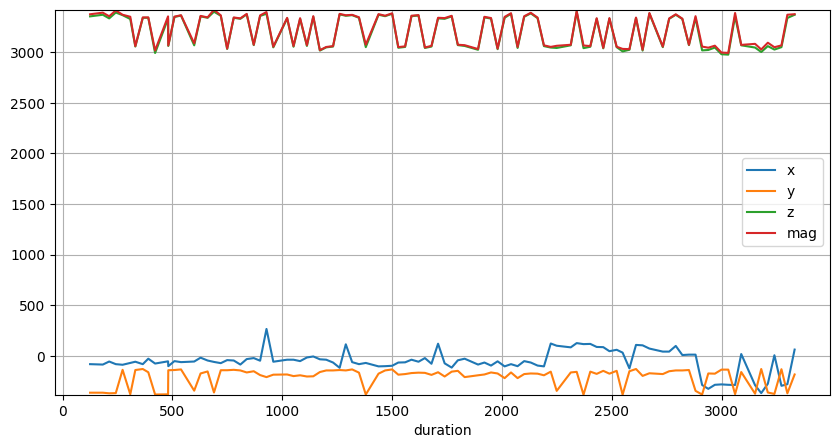

In [28]:
plot_acceleration(single_session_df, subplots=False)

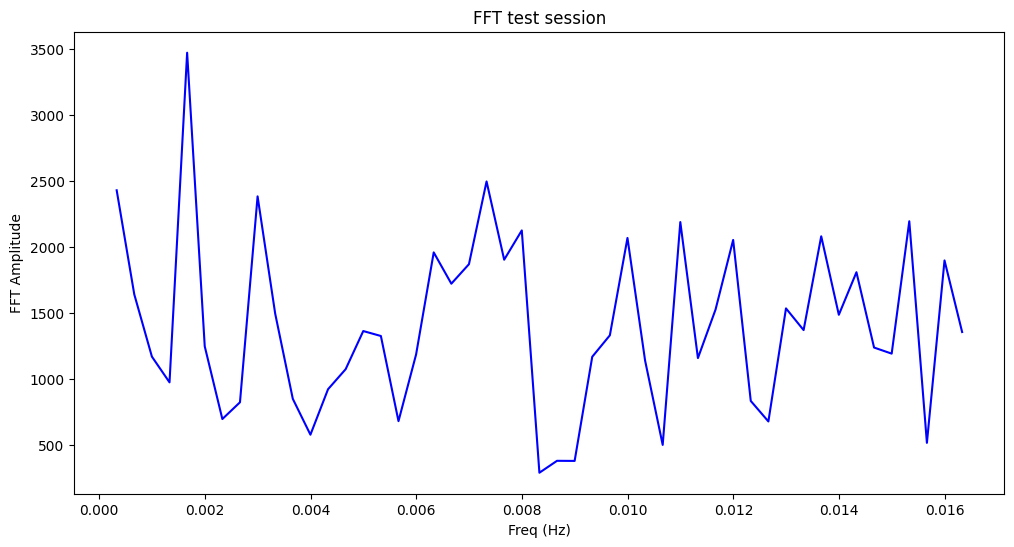

In [29]:
plot_fourier_transformation(single_session_df, 'test session')

/var/folders/p_/r5zw76hn11g2zmgj9dxfc3br0000gn/T/ipykernel_34034/235364607.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_std = slow_move_df.groupby(['uuid'])['x', 'y', 'z', 'mag'].agg('std')


<AxesSubplot: >

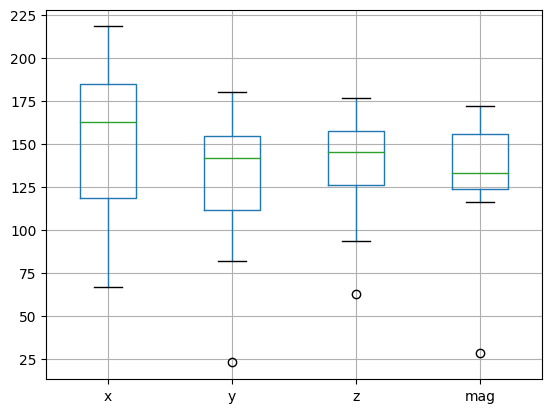

In [30]:
df_std = slow_move_df.groupby(['uuid'])['x', 'y', 'z', 'mag'].agg('std')
df_std.boxplot()

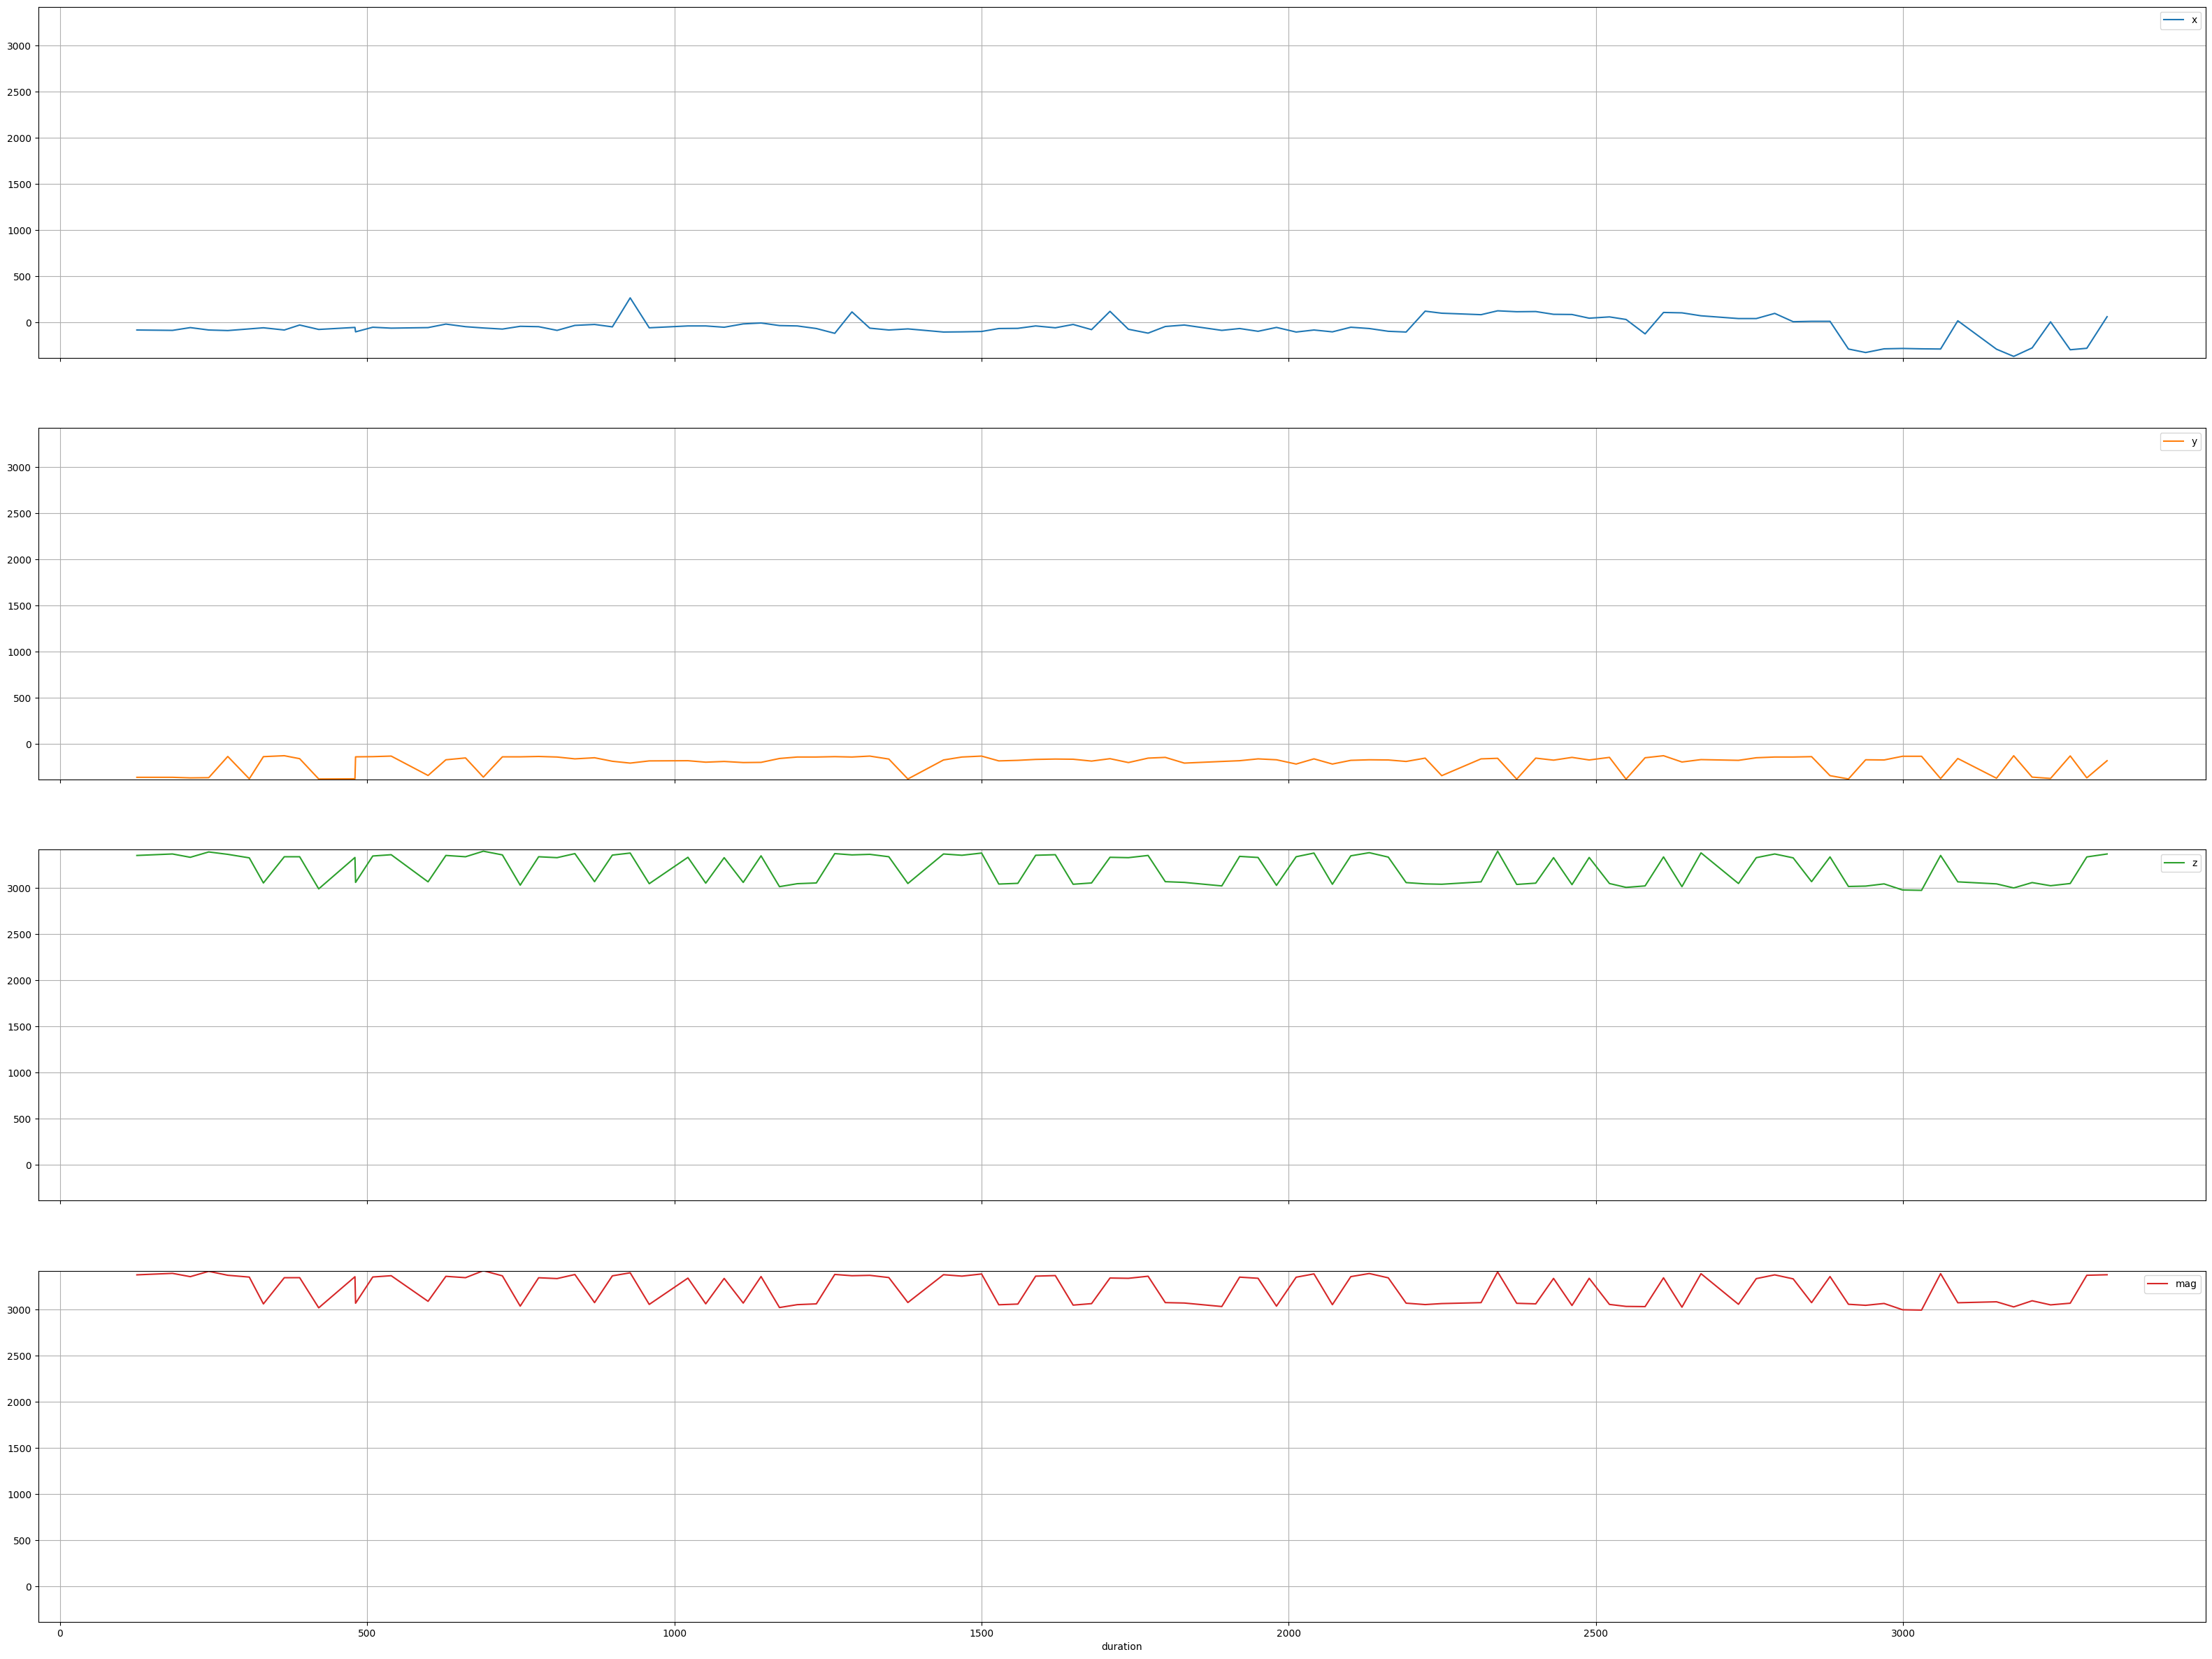

In [45]:
plot_acceleration(single_session_df)

In [32]:
slow_move_processed_df = accelerometer_feature_engineering(slow_move_df)

In [33]:
slow_move_processed_df.head()

x_std  \
age_group subject device                               hand     uuid                                               
30        30-02   C1C0369D-9684-B08A-4B55-12AD667E37FE dominant 37a13ab3-e60f-4838-83e9-da532a39831a  102.697673   
                                                                58d157db-0aec-489c-8df0-41414c91cef9  128.976062   
                                                                658f8d78-51df-4e81-841f-3c2dd8ee828b  104.850669   
                                                                87b711b8-6c4d-41c6-9963-462f52fafc35  182.740397   
                                                                fd4495be-6dce-43b3-b8c4-bcdc5d8cdf87  115.997833   

                                                                                                           y_std  \
age_group subject device                               hand     uuid                                               
30        30-02   C1C0369D-9684-B08A-4B55-12AD667E37FE dominant 37a13ab3-e60f-4838-83e9-da532a39831a  166.894644   
                                                                58d157db-0aec-489c-8df0-41414c91cef9  154.705577   
                                                                658f8d78-51df-4e81-841f-3c2dd8ee828b  131.775506   
                                                                87b711b8-6c4d-41c6-9963-462f52fafc35  147.136685   
                                                                fd4495be-6dce-43b3-b8c4-bcdc5d8cdf87  148.596584   

                                                                                                           z_std  \
age_group subject device                               hand     uuid                                               
30        30-02   C1C0369D-9684-B08A-4B55-12AD667E37FE dominant 37a13ab3-e60f-4838-83e9-da532a39831a  160.648295   
                                                                58d157db-0aec-489c-8df0-41414c91cef9  176.512755   
                                                                658f8d78-51df-4e81-841f-3c2dd8ee828b  165.761434   
                                                                87b711b8-6c4d-41c6-9963-462f52fafc35  172.332214   
                                                                fd4495be-6dce-43b3-b8c4-bcdc5d8cdf87  153.302611   

                                                                                                         mag_std  \
age_group subject device                               hand     uuid                                               
30        30-02   C1C0369D-9684-B08A-4B55-12AD667E37FE dominant 37a13ab3-e60f-4838-83e9-da532a39831a  164.757063   
                                                                58d157db-0aec-489c-8df0-41414c91cef9  171.970307   
                                                                658f8d78-51df-4e81-841f-3c2dd8ee828b  154.467180   
                                                                87b711b8-6c4d-41c6-9963-462f52fafc35  155.755503   
                                                                fd4495be-6dce-43b3-b8c4-bcdc5d8cdf87  139.193670   

                                                                                                           x_mean  \
age_group subject device                               hand     uuid                                                
30        30-02   C1C0369D-9684-B08A-4B55-12AD667E37FE dominant 37a13ab3-e60f-4838-83e9-da532a39831a  1285.789474   
                                                                58d157db-0aec-489c-8df0-41414c91cef9  1279.820513   
                                                                658f8d78-51df-4e81-841f-3c2dd8ee828b  1294.225352   
                                                                87b711b8-6c4d-41c6-9963-462f52fafc35  1370.355556   
                                                                fd4495be-6dce-43b3-b8c4-bcdc5d8cdf87  1295.833333   

                                   

In [34]:
slow_move_processed_df.corr()

,x_std,y_std,z_std,mag_std,x_mean,y_mean,z_mean,mag_mean,x_sem,y_sem,...,mag_peaks,x_sal,y_sal,z_sal,mag_sal,duration,x_snr,y_snr,z_snr,mag_snr
x_std,1.000000,0.360217,0.073990,0.174841,-0.398566,0.251159,0.285300,-0.500028,0.864339,0.374315,...,-0.169999,0.246320,-0.346197,0.171673,-0.037913,-0.122497,-0.405213,0.367228,0.275998,-0.381364
y_std,0.360217,1.000000,0.359195,0.470386,-0.032311,0.612322,0.491165,-0.215326,0.343765,0.838279,...,-0.157973,0.125993,-0.262241,0.051996,-0.071012,-0.115057,0.097290,0.625369,0.188940,-0.605217
z_std,0.073990,0.359195,1.000000,0.907755,0.009541,0.383359,0.511339,-0.377388,-0.042003,0.168693,...,0.108116,-0.268533,0.021917,0.275325,0.155167,0.198779,0.135869,0.535470,-0.481411,-0.686664
mag_std,0.174841,0.470386,0.907755,1.000000,0.112037,0.556043,0.725738,-0.348648,0.071314,0.298969,...,0.037700,-0.309016,-0.099316,0.252492,0.146734,0.133006,0.236837,0.733021,-0.150546,-0.858795
x_mean,-0.398566,-0.032311,0.009541,0.112037,1.000000,0.269545,0.379069,0.856353,-0.130278,0.191041,...,-0.440443,0.187349,-0.021790,-0.331485,-0.042379,-0.449376,0.960362,0.232225,0.359578,-0.132926
y_mean,0.251159,0.612322,0.383359,0.556043,0.269545,1.000000,0.680493,-0.064528,0.249832,0.548661,...,-0.172628,0.203984,0.023055,-0.128564,-0.217204,-0.146002,0.445581,0.901939,0.328727,-0.803081
z_mean,0.285300,0.491165,0.511339,0.725738,0.379069,0.680493,1.000000,-0.046188,0.268452,0.441559,...,-0.181782,-0.152385,-0.280172,0.119230,0.097159,-0.123281,0.474905,0.910240,0.493012,-0.915564
mag_mean,-0.500028,-0.215326,-0.377388,-0.348648,0.856353,-0.064528,-0.046188,1.000000,-0.210127,0.045070,...,-0.403910,0.343416,-0.014863,-0.375126,-0.123110,-0.460631,0.762944,-0.193558,0.309699,0.327751
x_sem,0.864339,0.343765,-0.042003,0.071314,-0.130278,0.249832,0.268452,-0.210127,1.000000,0.614611,...,-0.590244,0.318274,-0.408201,0.052593,-0.133382,-0.563588,-0.147494,0.318133,0.365486,-0.285354
y_sem,0.374315,0.838279,0.168693,0.298969,0.191041,0.548661,0.441559,0.045070,0.614611,1.000000,...,-0.625023,0.262428,-0.343625,-0.079447,-0.188467,-0.604449,0.280341,0.532224,0.318977,-0.466207


SEM is closely related to std -> therefore we drop it

In [35]:
slow_move_processed_df = slow_move_processed_df.drop(columns=['x_sem', 'y_sem', 'z_sem', 'mag_sem'])
slow_move_processed_df.corr()

,x_std,y_std,z_std,mag_std,x_mean,y_mean,z_mean,mag_mean,x_peaks,y_peaks,...,mag_peaks,x_sal,y_sal,z_sal,mag_sal,duration,x_snr,y_snr,z_snr,mag_snr
x_std,1.000000,0.360217,0.073990,0.174841,-0.398566,0.251159,0.285300,-0.500028,-0.155290,-0.021708,...,-0.169999,0.246320,-0.346197,0.171673,-0.037913,-0.122497,-0.405213,0.367228,0.275998,-0.381364
y_std,0.360217,1.000000,0.359195,0.470386,-0.032311,0.612322,0.491165,-0.215326,-0.061279,-0.133179,...,-0.157973,0.125993,-0.262241,0.051996,-0.071012,-0.115057,0.097290,0.625369,0.188940,-0.605217
z_std,0.073990,0.359195,1.000000,0.907755,0.009541,0.383359,0.511339,-0.377388,0.153760,0.110863,...,0.108116,-0.268533,0.021917,0.275325,0.155167,0.198779,0.135869,0.535470,-0.481411,-0.686664
mag_std,0.174841,0.470386,0.907755,1.000000,0.112037,0.556043,0.725738,-0.348648,0.092995,0.064956,...,0.037700,-0.309016,-0.099316,0.252492,0.146734,0.133006,0.236837,0.733021,-0.150546,-0.858795
x_mean,-0.398566,-0.032311,0.009541,0.112037,1.000000,0.269545,0.379069,0.856353,-0.405205,-0.578582,...,-0.440443,0.187349,-0.021790,-0.331485,-0.042379,-0.449376,0.960362,0.232225,0.359578,-0.132926
y_mean,0.251159,0.612322,0.383359,0.556043,0.269545,1.000000,0.680493,-0.064528,-0.141016,-0.169525,...,-0.172628,0.203984,0.023055,-0.128564,-0.217204,-0.146002,0.445581,0.901939,0.328727,-0.803081
z_mean,0.285300,0.491165,0.511339,0.725738,0.379069,0.680493,1.000000,-0.046188,-0.131931,-0.126399,...,-0.181782,-0.152385,-0.280172,0.119230,0.097159,-0.123281,0.474905,0.910240,0.493012,-0.915564
mag_mean,-0.500028,-0.215326,-0.377388,-0.348648,0.856353,-0.064528,-0.046188,1.000000,-0.396139,-0.536445,...,-0.403910,0.343416,-0.014863,-0.375126,-0.123110,-0.460631,0.762944,-0.193558,0.309699,0.327751
x_peaks,-0.155290,-0.061279,0.153760,0.092995,-0.405205,-0.141016,-0.131931,-0.396139,1.000000,0.886930,...,0.962535,-0.322448,0.118417,0.195698,0.240315,0.954787,-0.406667,-0.101827,-0.277624,0.014933
y_peaks,-0.021708,-0.133179,0.110863,0.064956,-0.578582,-0.169525,-0.126399,-0.536445,0.886930,1.000000,...,0.926581,-0.361223,0.098235,0.189799,0.124771,0.933769,-0.567390,-0.093613,-0.244429,-0.004150


In [36]:
feature_keys = ['x_std','y_std','z_std','mag_std','x_mean','y_mean','z_mean','mag_mean','x_peaks','y_peaks','z_peaks','mag_peaks','x_snr','y_snr','z_snr','mag_snr', 'x_sal','y_sal','z_sal','mag_sal','duration']
class_key = ['age_group']

/Users/timo/Documents/code/fhnw/master_thesis_analysis/src/accelerometer.py:184: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_grouped.boxplot(fontsize=20, ax=ax)
/Users/timo/Documents/code/fhnw/master_thesis_analysis/src/accelerometer.py:184: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_grouped.boxplot(fontsize=20, ax=ax)
/Users/timo/Documents/code/fhnw/master_thesis_analysis/src/accelerometer.py:184: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_grouped.boxplot(fontsize=20, ax=ax)
/Users/timo/Documents/code/fhnw/master_thesis_analysis/src/accelerometer.py:184: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_grouped.boxplot(fontsize=20, ax=ax)
/Users/timo/

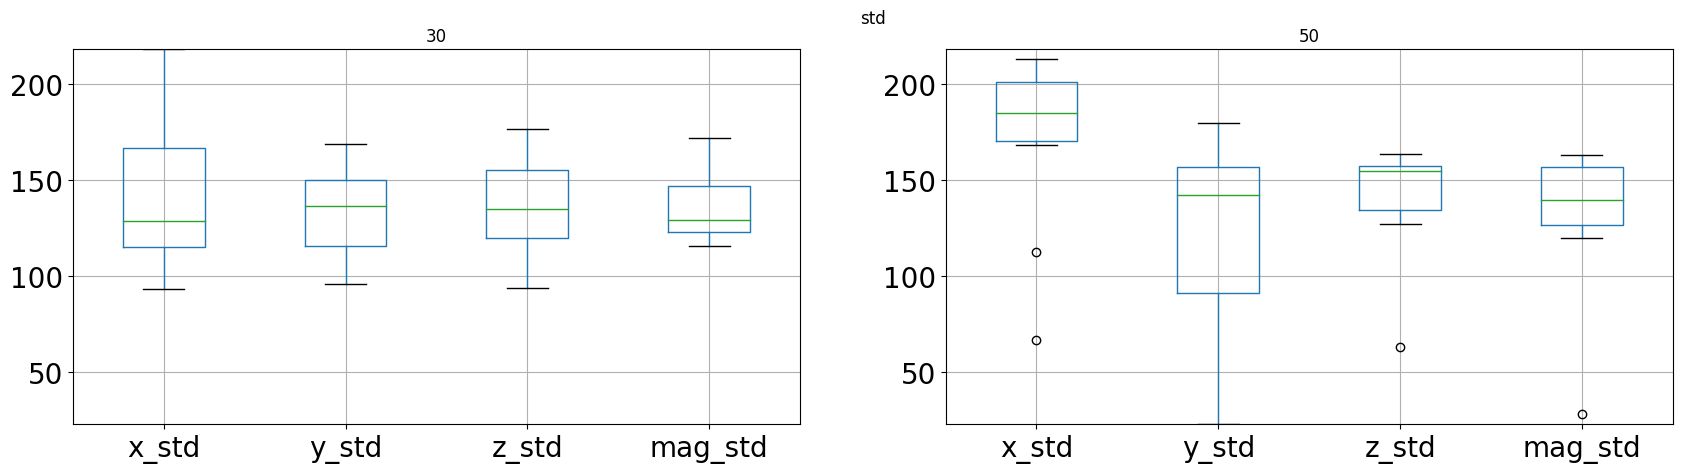

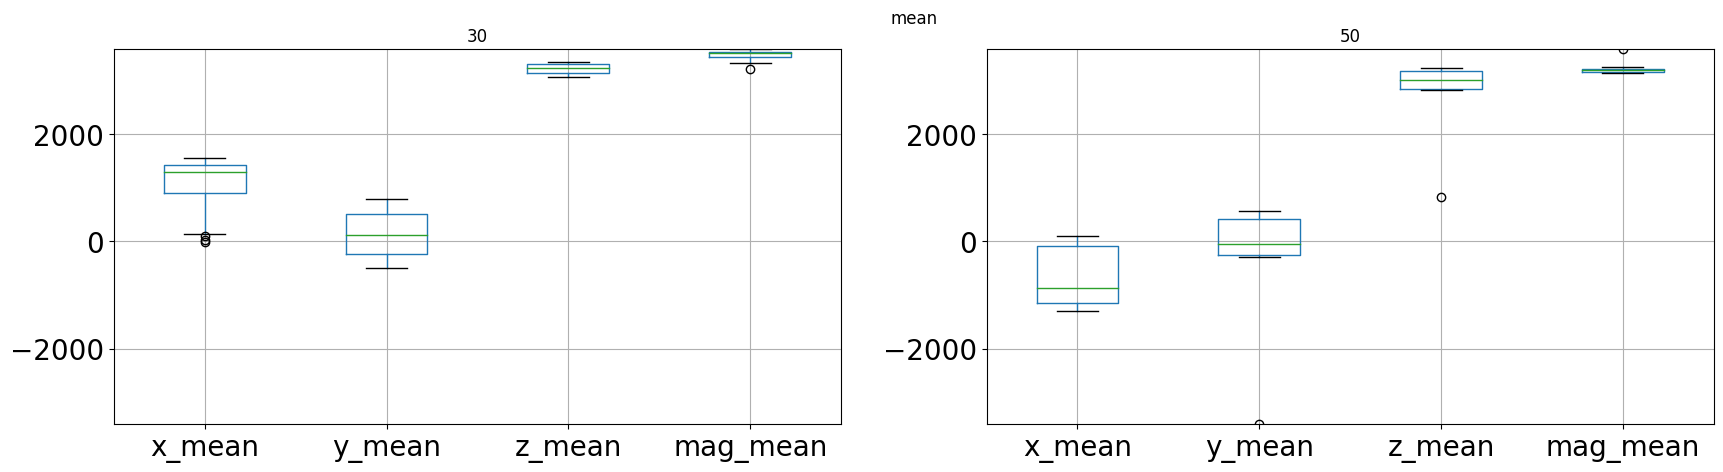

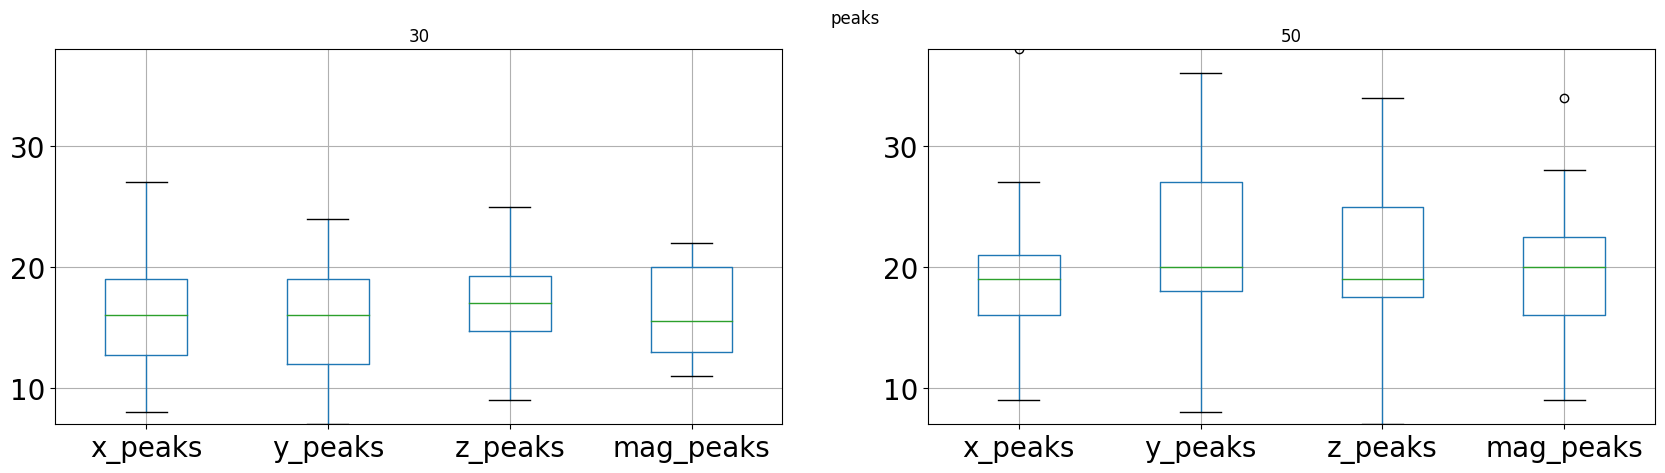

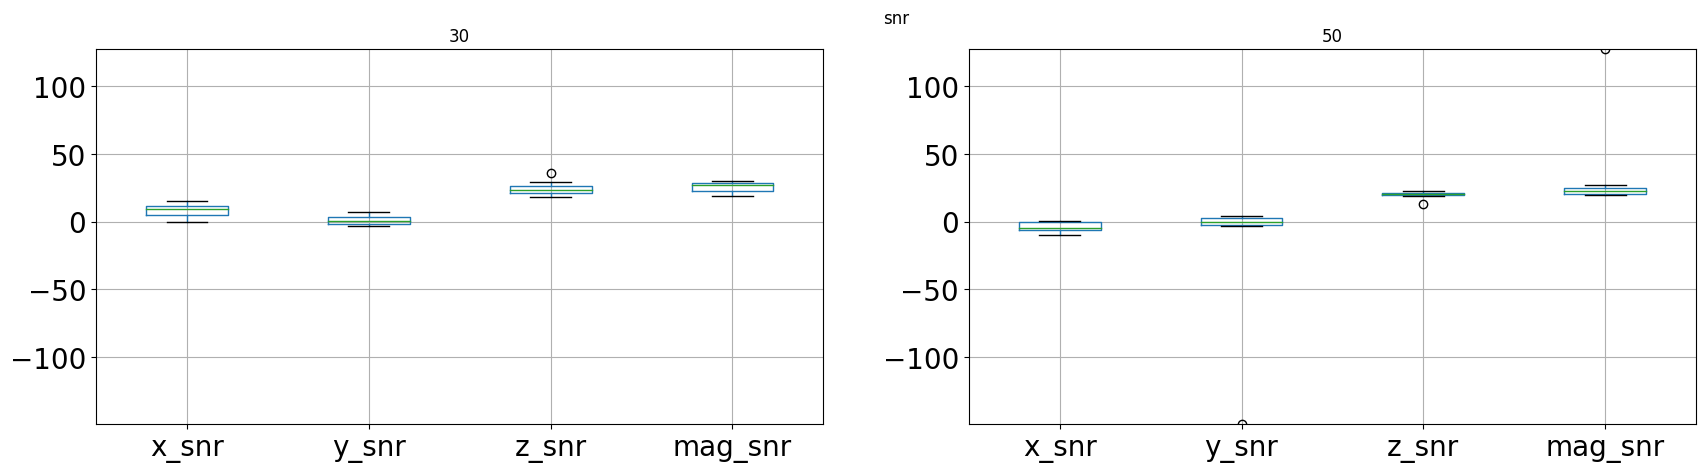

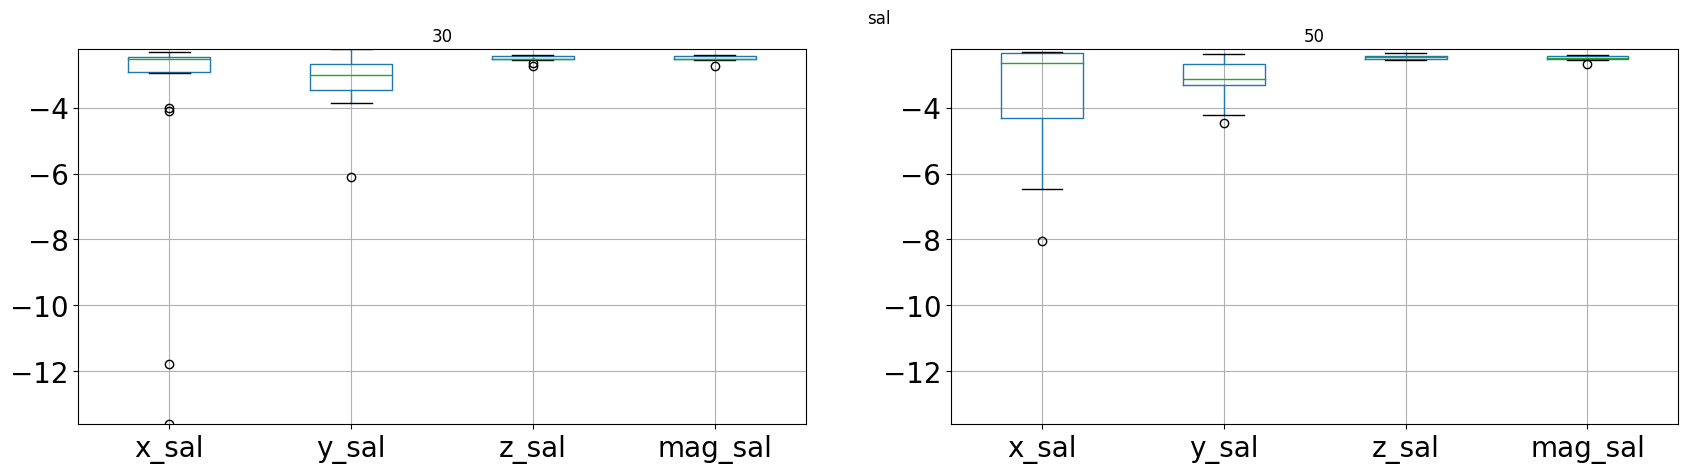

In [37]:
plot_feature_columns(slow_move_processed_df,class_key,'std')
plot_feature_columns(slow_move_processed_df,class_key,'mean')
plot_feature_columns(slow_move_processed_df,class_key,'peaks')
plot_feature_columns(slow_move_processed_df,class_key,'snr')
plot_feature_columns(slow_move_processed_df,class_key,'sal')

We can see that there is no significant deviation between the two age groups in the following features:
- y_mean
- mag_mean
- z_snr
- mag_snr
- z_sal
- mag_sal

In [38]:
slow_move_processed_df = slow_move_processed_df.reset_index(drop=False)
train_df, test_df = train_test_split(slow_move_processed_df, test_size=0.10)

In [39]:
feature_keys = ['x_std','z_std', 'z_std','mag_std','x_mean','y_mean','x_peaks','y_peaks','z_peaks','mag_peaks','x_snr','y_snr','x_sal','y_sal']

# Apply Kmeans Clustering

In [40]:
kmeans_model = kmeans(train_df, feature_keys)
kmeans_predicitons = kmeans_model.predict(test_df[feature_keys])
predictions_df = pd.DataFrame()
predictions_df['age_group'] = test_df['age_group']
predictions_df['cluster'] = kmeans_predicitons
predictions_df

,age_group,cluster
15,30,0
26,50,1
25,50,1
28,50,1


# Principal Component Analysis

In [41]:
principal_components_df = principal_component_analysis(slow_move_processed_df, feature_keys)

<Figure size 640x480 with 0 Axes>

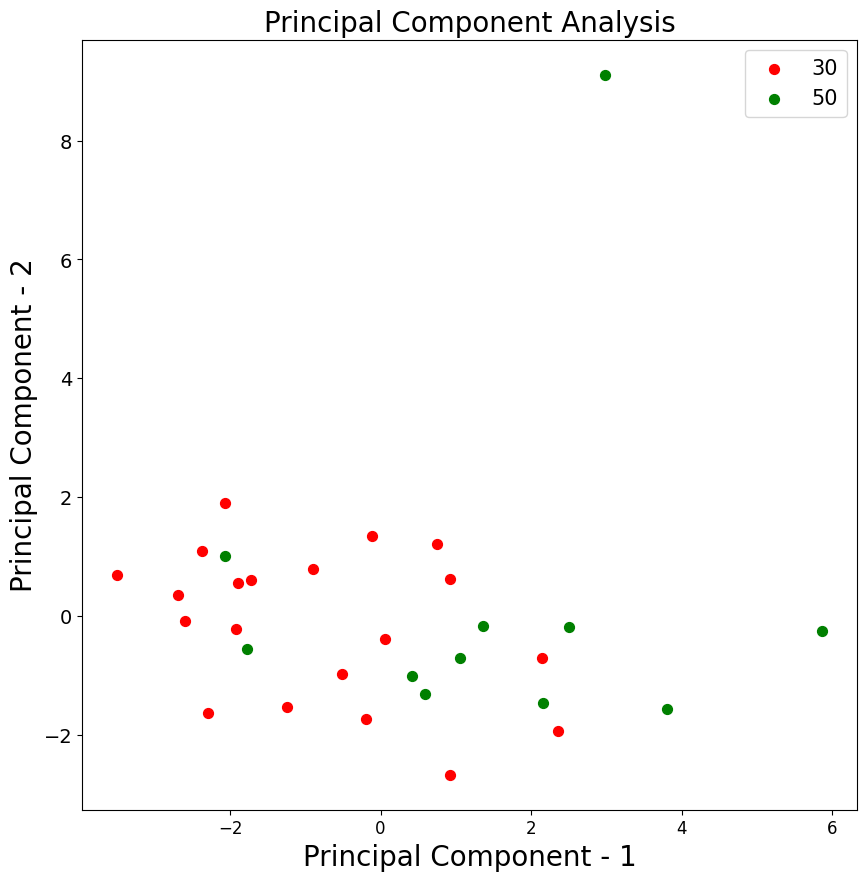

In [42]:
plot_principal_component_analysis(slow_move_processed_df, principal_components_df, 'age_group', [30,50])

# Decision Tree

In [43]:
dt = decision_tree(train_df, feature_keys)

In [44]:
dt_predictions = dt.predict(test_df[feature_keys])
metrics.accuracy_score(test_df['age_group'], dt_predictions)

1.0